## High percentile precipitation rate, all models together

extremes for the domain as a whole (high percentile daily precipitation rate) averaged over a time period

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import cm
import cartopy.crs as ccrs
import cartopy.feature as cfeat

from os.path import expanduser
home = expanduser("~")

import timeit

import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning) 


switch = {
    'local_files': True, 
    'nci_files': False, 
    }

In [6]:
models = [
    'IPSL-CM5A-MR', # 1
    'GFDL-CM3',     # 2
    'GISS-E2-H',    # 3
    'bcc-csm1-1',   # 4
    'CNRM-CM5',     # 5
    # 'CCSM4',        # 6 # cannot concatanate files for rcp85 run
    'HadGEM2-AO',   # 7
    'BNU-ESM',      # 8
    'EC-EARTH',     # 9
    'FGOALS-g2',    # 10
    'MPI-ESM-MR',   # 11
    'CMCC-CM',      # 12
    'inmcm4',       # 13
    'NorESM1-M',    # 14
    'CanESM2',      # 15
    'MIROC5',       # 16
    'HadGEM2-CC',   # 17
    'MRI-CGCM3',    # 18
    'CESM1-BGC'     # 19
    ]


experiments = [
    'historical',
    # 'rcp85'
    ]
experiment = experiments[0]


In [3]:
model = 'GFDL-CM3'
if switch['local_files']:
    folder = home + '/Documents/data/cmip5/' + model

if switch['nci_files']:
    folder = '/g/data/k10/cb4968/data/cmip5/'+ model


fileName = model + '_pr_percentiles_' + experiment + '.nc'
path = folder + '/' + fileName
pr_percentiles = xr.open_dataset(path)
pr_percentiles

<xarray.Dataset>
Dimensions:  (time: 10950)
Coordinates:
  * time     (time) object 2070-01-01 12:00:00 ... 2099-12-31 12:00:00
Data variables:
    pr95     (time) float64 ...
    pr97     (time) float64 ...
    pr99     (time) float64 ...
    pr999    (time) float64 ...

In [4]:
percentile_options = [
    # 'pr95',
    # 'pr97',
    'pr99',
    # 'pr999',
    ]
percentile_option = percentile_options[0]

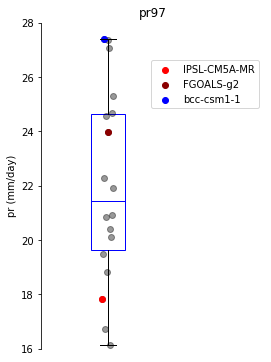

In [19]:
y= []
for model in models:
    if switch['local_files']:
        folder = home + '/Documents/data/cmip5/' + model

    if switch['nci_files']:
        folder = '/g/data/k10/cb4968/data/cmip5/'+ model

    fileName = model + '_pr_percentiles_' + experiment + '.nc'
    path = folder + '/' + fileName
    pr_percentiles = xr.open_dataset(path)
    y = np.append(y, pr_percentiles[percentile_option].mean(dim='time'))

plt.figure(figsize=(4,6))
plt.xlim(0,1)
# plt.ylim(16,28)

plt.boxplot(y,vert=True, positions= [0.3], patch_artist=True, medianprops = dict(color="b",linewidth=1),boxprops = dict(color="b",facecolor='w',zorder=0)
            ,sym='+',flierprops = dict(color="r"))


x = np.linspace(0.3-0.025, 0.3+0.025, len(y))
plt.scatter(x, y, c='k', alpha=0.4)
#plt.scatter(np.ones(len(y)), y)


x_leg = [models.index('IPSL-CM5A-MR'),models.index('FGOALS-g2'), models.index('bcc-csm1-1')]
label = ['IPSL-CM5A-MR','FGOALS-g2','bcc-csm1-1']
colors = ['r','darkred','b']
j=0
for i in x_leg:
    plt.scatter(x[i],y[i],c=colors[j], label=label[j])
    j+=1


plt.xticks([])
plt.title(percentile_option + ', ' + experiment)
plt.ylabel('pr (mm/day)')
plt.legend(bbox_to_anchor=(0.6,0.5,0.4,0.4))

sns.despine(top=True, right=True, left=False, bottom=True)

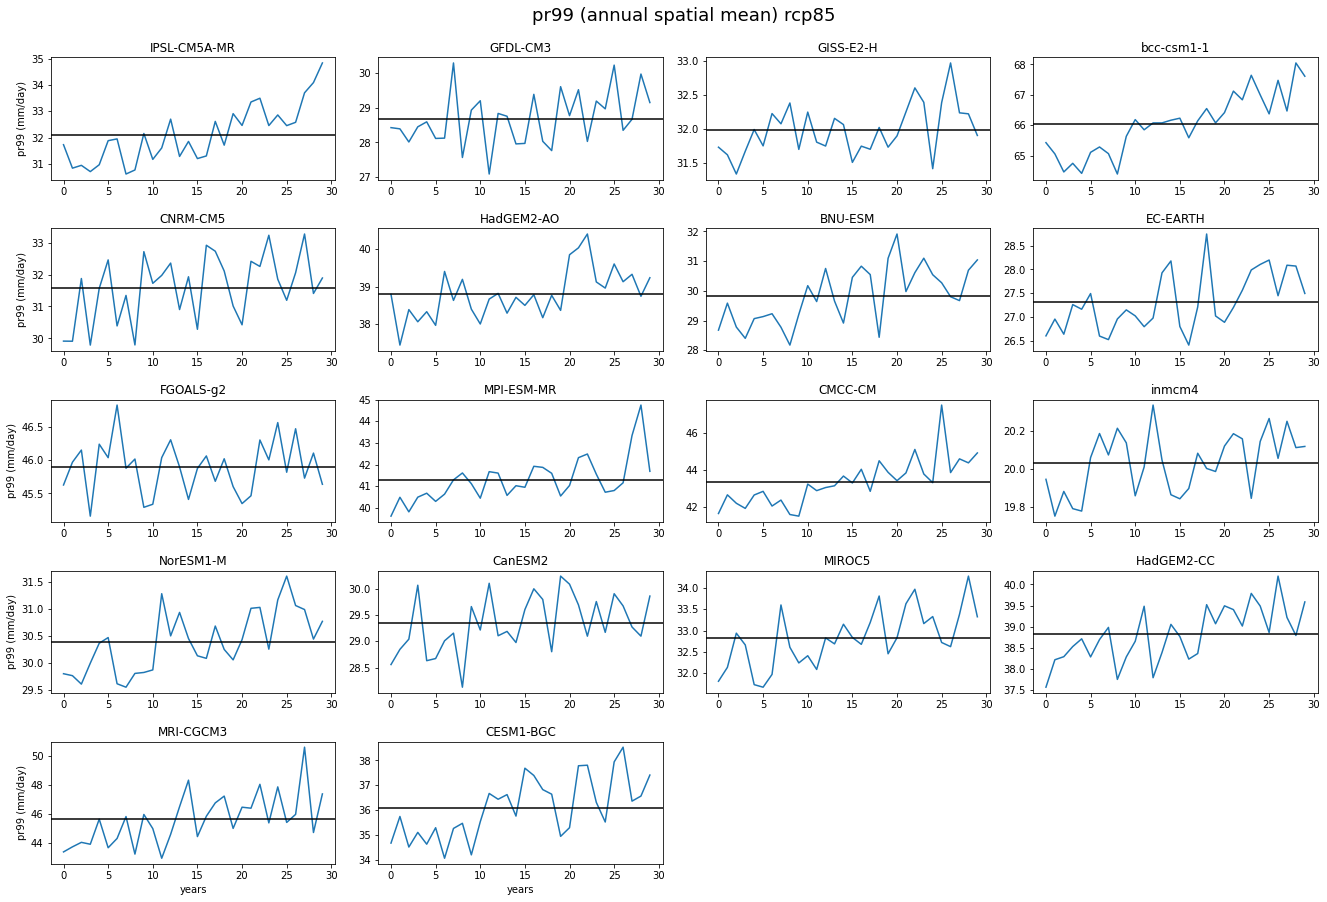

In [6]:
f, axes = plt.subplots(nrows=5, ncols=4, figsize = (22,14))
f.suptitle(percentile_option + ' (annual spatial mean) ' + experiment, fontsize=18, y=0.95)

for model, ax in zip(models, axes.ravel()):
    if switch['local_files']:
        folder = home + '/Documents/data/cmip5/' + model

    if switch['nci_files']:
        folder = '/g/data/k10/cb4968/data/cmip5/'+ model

    fileName = model + '_pr_percentiles_' + experiment + '.nc'
    path = folder + '/' + fileName
    pr_percentiles = xr.open_dataset(path)

    ax.plot(pr_percentiles[percentile_option].resample(time='Y').mean(dim='time'))
    ax.axhline(y=pr_percentiles[percentile_option].resample(time='Y').mean(dim='time').mean(dim='time'), color='k')
    ax.set_title(model)

    if model == 'MRI-CGCM3' or model == 'CESM1-BGC':
        ax.set_xlabel('years')

    if model == 'IPSL-CM5A-MR' or model == 'CNRM-CM5' or model == 'FGOALS-g2' or model == 'NorESM1-M' or model == 'MRI-CGCM3': 
        ax.set_ylabel(percentile_option + ' (mm/day)')

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.15, hspace=0.4)
axes[-1, 2].remove()
axes[-1, 3].remove()

In [7]:
def to_monthly(da):
    year = da.time.dt.year
    month = da.time.dt.month

    # assign new coords
    da = da.assign_coords(year=("time", year.data), month=("time", month.data))

    # reshape the array to (..., "month", "year")
    return da.set_index(time=("year", "month")).unstack("time")

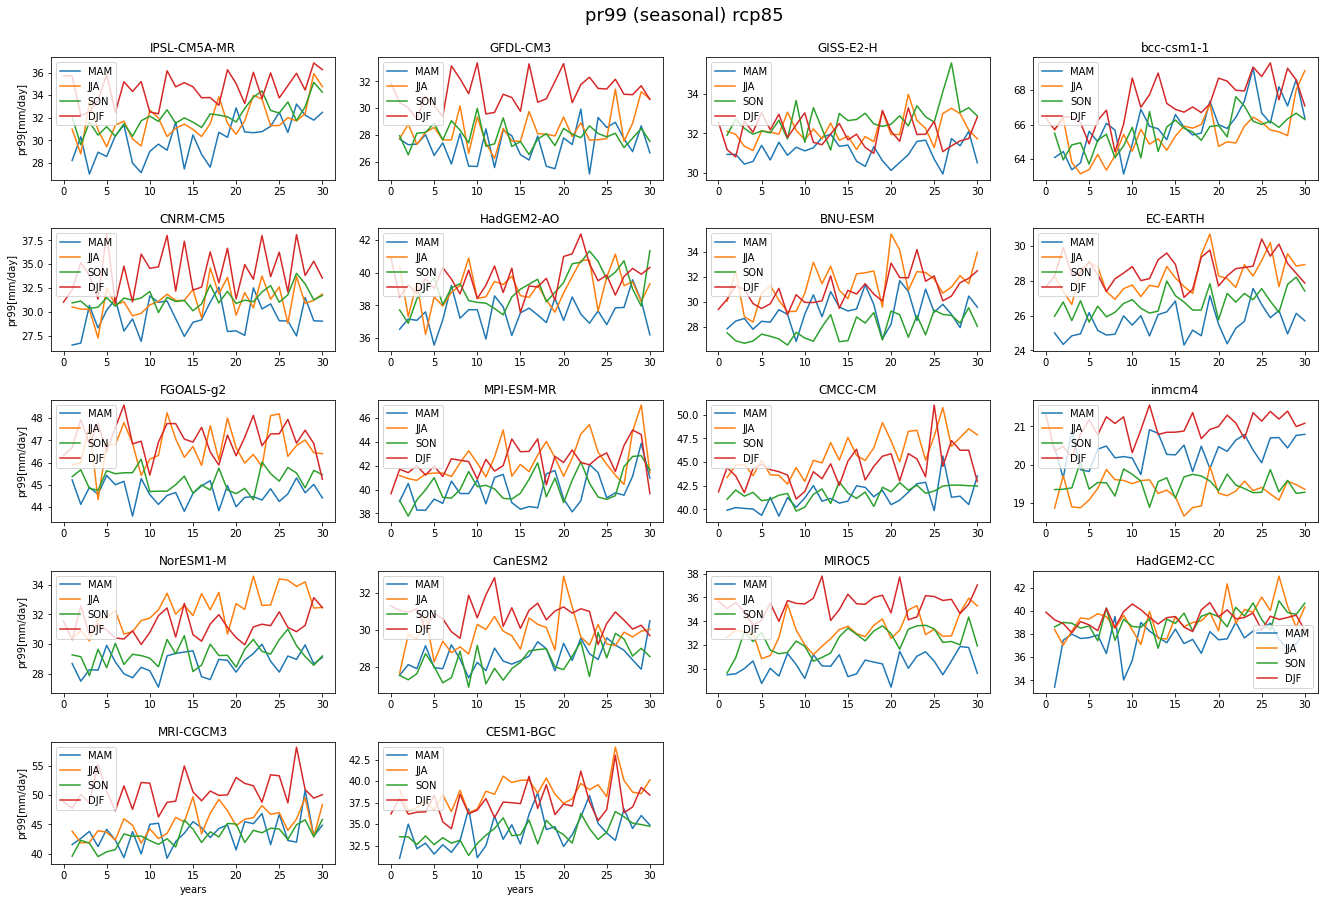

In [8]:
f, axes = plt.subplots(nrows=5, ncols=4, figsize = (22,14))
f.suptitle(percentile_option + ' (seasonal) ' + experiment, fontsize=18, y=0.95)

for model, ax in zip(models, axes.ravel()):
    if switch['local_files']:
        folder = home + '/Documents/data/cmip5/' + model

    if switch['nci_files']:
        folder = '/g/data/k10/cb4968/data/cmip5/'+ model

    fileName = model + '_pr_percentiles_' + experiment + '.nc'
    path = folder + '/' + fileName
    pr_percentiles = xr.open_dataset(path)

    pr_season = pr_percentiles[percentile_option].resample(time='QS-DEC').mean(dim="time")
    pr_season = to_monthly(pr_season)
    pr_season = pr_season.rename({'month':'season'})
    pr_season = pr_season.assign_coords(season = ["MAM", "JJA", "SON", "DJF"])

    ax.plot(pr_season, label = pr_season.season.values)
    ax.set_title(model)
    ax.legend()

    if model == 'MRI-CGCM3' or model == 'CESM1-BGC':
        ax.set_xlabel('years')

    if model == 'IPSL-CM5A-MR' or model == 'CNRM-CM5' or model == 'FGOALS-g2' or model == 'NorESM1-M' or model == 'MRI-CGCM3': 
        ax.set_ylabel(percentile_option + '[mm/day]')

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.15, hspace=0.4)
axes[-1, 2].remove()
axes[-1, 3].remove()

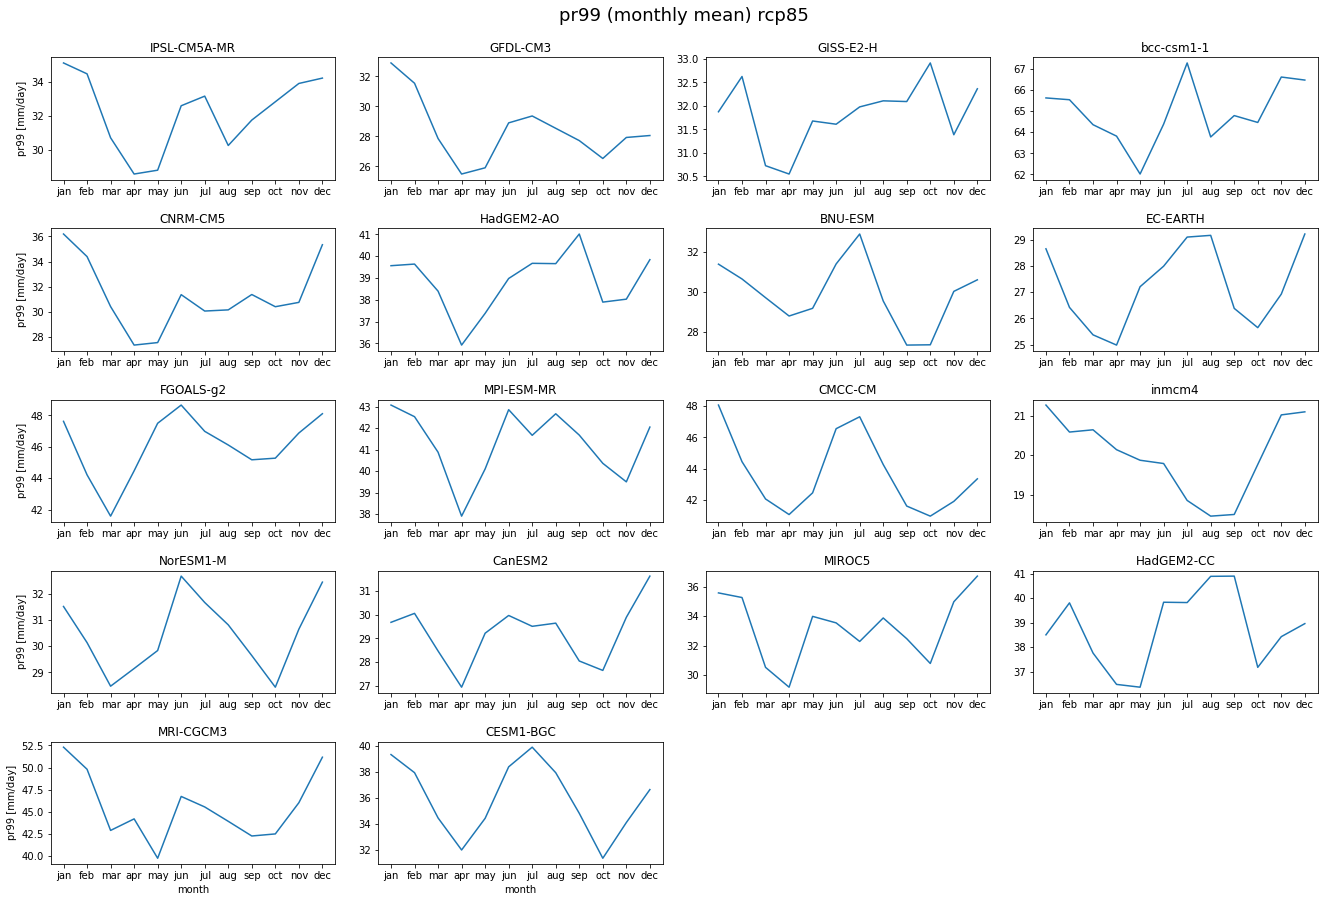

In [9]:
f, axes = plt.subplots(nrows=5, ncols=4, figsize = (22,14))
f.suptitle(percentile_option + ' (monthly mean) ' + experiment, fontsize=18, y=0.95)

for model, ax in zip(models, axes.ravel()):
    if switch['local_files']:
        folder = home + '/Documents/data/cmip5/' + model

    if switch['nci_files']:
        folder = '/g/data/k10/cb4968/data/cmip5/'+ model

    fileName = model + '_pr_percentiles_' + experiment + '.nc'
    path = folder + '/' + fileName
    pr_percentiles= xr.open_dataset(path)

    pr_monthly = to_monthly(pr_percentiles[percentile_option])
    pr_monthly = pr_monthly.assign_coords(month = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul','aug', 'sep', 'oct', 'nov', 'dec'])

    ax.plot(pr_monthly.mean(dim='year'))
    ax.set_title(model)
    ax.set_xticks(np.arange(0,12))
    ax.set_xticklabels(pr_monthly.month.values)

    if model == 'MRI-CGCM3' or model == 'CESM1-BGC':
        ax.set_xlabel('month')

    if model == 'IPSL-CM5A-MR' or model == 'CNRM-CM5' or model == 'FGOALS-g2' or model == 'NorESM1-M' or model == 'MRI-CGCM3': 
        ax.set_ylabel(percentile_option + ' [mm/day]')

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.15, hspace=0.4)
axes[-1, 2].remove()
axes[-1, 3].remove()

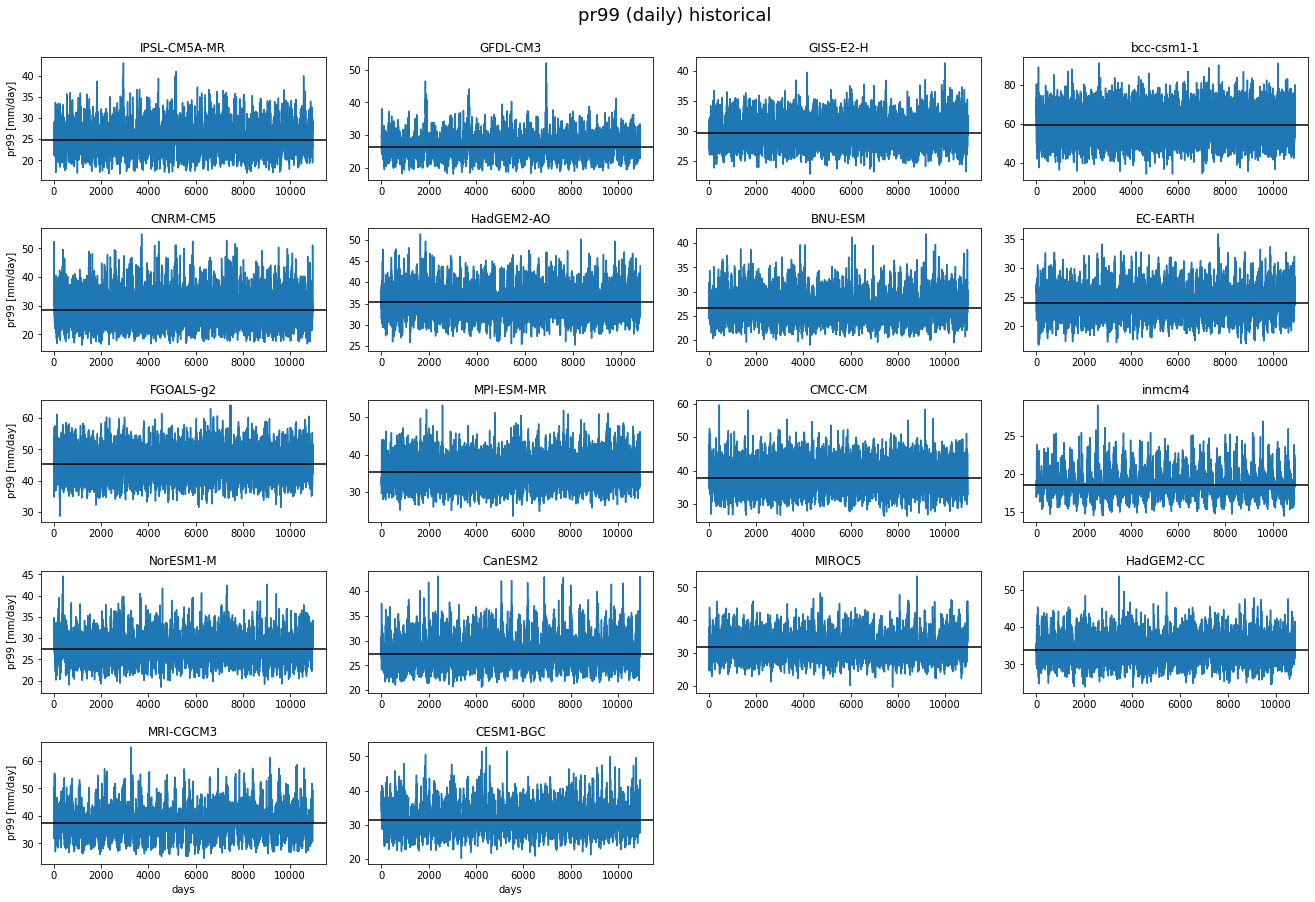

In [7]:
f, axes = plt.subplots(nrows=5, ncols=4, figsize = (22,14))
f.suptitle(percentile_option + ' (daily) ' + experiment, fontsize=18, y=0.95)

for model, ax in zip(models, axes.ravel()):
    if switch['local_files']:
        folder = home + '/Documents/data/cmip5/' + model

    if switch['nci_files']:
        folder = '/g/data/k10/cb4968/data/cmip5/'+ model

    fileName = model + '_pr_percentiles_' + experiment + '.nc'
    path = folder + '/' + fileName
    pr_percentiles = xr.open_dataset(path)

    ax.plot(pr_percentiles[percentile_option])
    ax.axhline(y=pr_percentiles[percentile_option].mean(dim='time'), color='k')
    ax.set_title(model)
    # ax.set_ylim(0,100)

    if model == 'MRI-CGCM3' or model == 'CESM1-BGC':
        ax.set_xlabel('days')

    if model == 'IPSL-CM5A-MR' or model == 'CNRM-CM5' or model == 'FGOALS-g2' or model == 'NorESM1-M' or model == 'MRI-CGCM3': 
        ax.set_ylabel(percentile_option + ' [mm/day]')

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.15, hspace=0.4)
axes[-1, 2].remove()
axes[-1, 3].remove()